In [1]:
# Importing all the libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from statistics import mode
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial import distance
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch

from pandas.plotting import parallel_coordinates
import plotly.express as px

In [2]:
# read in data
df = pd.read_csv('laterality_data.csv')

In [3]:
# check in on data
df.head()

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,...,LI MD,LI Volume,TOI,Control,category,hand,Hand,ROI 1,ROI 2,Type
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,...,0.015758,-0.068848,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,...,NaN,0.167642,no,yes,Language,NaN,NaN,Frontal,Temporal,Association
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,...,NaN,0.010843,yes,no,Vertical,NaN,NaN,Frontal,Frontal,Association
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,...,0.002403,-0.012036,no,no,Motor,NaN,NaN,Medulla,Motor Cortex,Projection
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,...,-0.014053,-0.066723,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection


In [4]:
df.count()

Match Flag            44648
subjectID             44648
Data                  44648
Order_FA_child        44648
Order_volume_child    44648
Order_MD_child        44648
structureID           44648
gender                44648
gender_non            44648
Age_gr_12             44648
Age Group             44648
Age                   44648
LI FA                 41241
LI MD                 41272
LI Volume             41040
TOI                   44648
Control               44648
category              44648
hand                  43510
Hand                  43390
ROI 1                 44648
ROI 2                 44648
Type                  44648
dtype: int64

In [5]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21]
df = df[df.columns[cols]]
df

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,Age Group,Age,LI FA,LI MD,LI Volume,TOI,Control,category,ROI 1,ROI 2
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,Child,3.416667,-0.003511,0.015758,-0.068848,no,no,Cerebellar,Frontal,Cerebellum
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,Child,3.416667,0.034870,NaN,0.167642,no,yes,Language,Frontal,Temporal
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,Child,3.416667,-0.010014,NaN,0.010843,yes,no,Vertical,Frontal,Frontal
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,Child,3.416667,NaN,0.002403,-0.012036,no,no,Motor,Medulla,Motor Cortex
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,Child,3.416667,0.006478,-0.014053,-0.066723,no,no,Cerebellar,Frontal,Cerebellum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44643,3,CC721374,CAMCAN,MotorThalamic,MotorThalamic,MotorThalamic,MotorThalamic,0,M,80->,Senior,86.000000,0.046822,-0.035798,0.025188,no,no,Cerebellar,Thalamic,Motor Cortex
44644,3,CC721374,CAMCAN,pArc,pArc,pArc,pArc,0,M,80->,Senior,86.000000,-0.047697,0.038274,-0.058535,yes,no,Posterior Vertical,Temporal,Parietal
44645,3,CC721374,CAMCAN,ParietoThalamic,ParietoThalamic,ParietoThalamic,ParietoThalamic,0,M,80->,Senior,86.000000,NaN,-0.017686,-0.037982,no,no,Thalamic,Parietal,Thalamic
44646,3,CC721374,CAMCAN,SpinoThalamic,SpinoThalamic,SpinoThalamic,SpinoThalamic,0,M,80->,Senior,86.000000,0.019873,-0.000048,0.016270,no,no,Thalamic,Medulla,Thalamic


In [6]:
# dropping all NA's or missing data
df.dropna(how = 'any', inplace = True)
df

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,Age Group,Age,LI FA,LI MD,LI Volume,TOI,Control,category,ROI 1,ROI 2
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,Child,3.416667,-0.003511,0.015758,-0.068848,no,no,Cerebellar,Frontal,Cerebellum
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,Child,3.416667,0.006478,-0.014053,-0.066723,no,no,Cerebellar,Frontal,Cerebellum
5,3,P1158,PING,ContraMotorCerebellar,ContraMotorCerebellar,ContraMotorCerebellar,ContraMotorCerebellar,0,M,0-12,Child,3.416667,0.008928,-0.000257,-0.049949,no,no,Cerebellar,Motor,Cerebellum
10,3,P1158,PING,MotorCerebellar,MotorCerebellar,MotorCerebellar,MotorCerebellar,0,M,0-12,Child,3.416667,0.012617,0.012994,-0.057997,no,no,Cerebellar,Motor,Cerebellum
11,3,P1158,PING,OccipitoCerebellar,OccipitoCerebellar,OccipitoCerebellar,OccipitoCerebellar,0,M,0-12,Child,3.416667,-0.007761,0.015024,0.064990,no,no,Cerebellar,Occipital,Cerebellum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44640,3,CC721374,CAMCAN,VOF,VOF,VOF,VOF,0,M,80->,Senior,86.000000,-0.070059,0.028502,-0.019443,yes,no,Vertical,Occipital,Occipital
44641,3,CC721374,CAMCAN,FrontoThalamic,FrontoThalamic,FrontoThalamic,FrontoThalamic,0,M,80->,Senior,86.000000,0.029330,-0.006677,0.168788,no,no,Thalamic,Frontal,Thalamic
44643,3,CC721374,CAMCAN,MotorThalamic,MotorThalamic,MotorThalamic,MotorThalamic,0,M,80->,Senior,86.000000,0.046822,-0.035798,0.025188,no,no,Cerebellar,Thalamic,Motor Cortex
44644,3,CC721374,CAMCAN,pArc,pArc,pArc,pArc,0,M,80->,Senior,86.000000,-0.047697,0.038274,-0.058535,yes,no,Posterior Vertical,Temporal,Parietal


In [7]:
df.count()

Match Flag            35595
subjectID             35595
Data                  35595
Order_FA_child        35595
Order_volume_child    35595
Order_MD_child        35595
structureID           35595
gender                35595
gender_non            35595
Age_gr_12             35595
Age Group             35595
Age                   35595
LI FA                 35595
LI MD                 35595
LI Volume             35595
TOI                   35595
Control               35595
category              35595
ROI 1                 35595
ROI 2                 35595
dtype: int64

In [8]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume
count,35595.0,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000
mean,3.0,0.555303,35.876978,0.014642,-0.008911,0.003643
std,0.0,0.496939,15.315036,0.026695,0.024202,0.111180
min,3.0,0.000000,3.416667,-0.187483,-0.120564,-0.805225
25%,3.0,0.000000,27.000000,-0.001329,-0.023455,-0.052887
50%,3.0,1.000000,31.000000,0.013918,-0.008472,0.007771
75%,3.0,1.000000,37.000000,0.029680,0.005501,0.063533
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430


In [9]:
df.dropna(inplace=True)
df.count()

Match Flag            35595
subjectID             35595
Data                  35595
Order_FA_child        35595
Order_volume_child    35595
Order_MD_child        35595
structureID           35595
gender                35595
gender_non            35595
Age_gr_12             35595
Age Group             35595
Age                   35595
LI FA                 35595
LI MD                 35595
LI Volume             35595
TOI                   35595
Control               35595
category              35595
ROI 1                 35595
ROI 2                 35595
dtype: int64

In [10]:
# find all the columns for the features that we desire adn create a new dataframe
cols = [12]
the_ml_data_old = df[df.columns[cols]]
the_ml_data_old

,LI FA
0,-0.003511
4,0.006478
5,0.008928
10,0.012617
11,-0.007761
...,...
44640,-0.070059
44641,0.029330
44643,0.046822
44644,-0.047697


In [11]:
# Check in on data 
the_ml_data_old.head()
the_ml_data_old.count()

LI FA    35595
dtype: int64

In [12]:
the_ml_data_old.index

Int64Index([    0,     4,     5,    10,    11,    12,    16,    17,    22,
               26,
            ...
            44635, 44636, 44637, 44638, 44639, 44640, 44641, 44643, 44644,
            44646],
           dtype='int64', length=35595)

In [13]:
# Find quick statistics about each feature
the_ml_data_old.describe()

,LI FA
count,35595.000000
mean,0.014642
std,0.026695
min,-0.187483
25%,-0.001329
50%,0.013918
75%,0.029680
max,0.237326


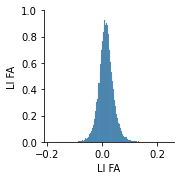

In [14]:
# create a pairplot to visually see correlations between data
sns.pairplot(the_ml_data_old, palette = 'magma')

## Machine Learning Model

In [15]:
heatmap_data_before = pd.pivot_table(df, values='LI FA',
                             index=['Order_FA_child'],
                             columns='Age Group')
heatmap_data_before.dropna(inplace=True)
heatmap_data_before.index.names = ['Regions of the Brain']

heatmap_data_before

Age Group,Adolescent,Adult,Child,Middle Age,Senior
Regions of the Brain,,,,,
AnterioFrontoCerebellar,0.006964,0.016402,-0.001383,0.016785,0.021505
Arc,0.016139,0.037126,0.012195,0.019770,0.023055
Aslant,0.011315,0.028006,0.000708,0.034851,0.037006
Baum,0.014359,0.024711,0.023192,0.008768,0.009876
CST,0.002886,0.004251,0.006231,0.019092,0.023247
Cingulum,0.029806,0.037872,0.044103,0.036011,0.044806
ContraAnterioFrontoCerebellar,0.006286,0.012841,-0.006652,0.009957,0.009697
ContraMotorCerebellar,0.008918,0.006284,0.004558,0.008201,0.011467
FrontoThalamic,-0.002189,0.030870,-0.005601,0.015037,0.021139


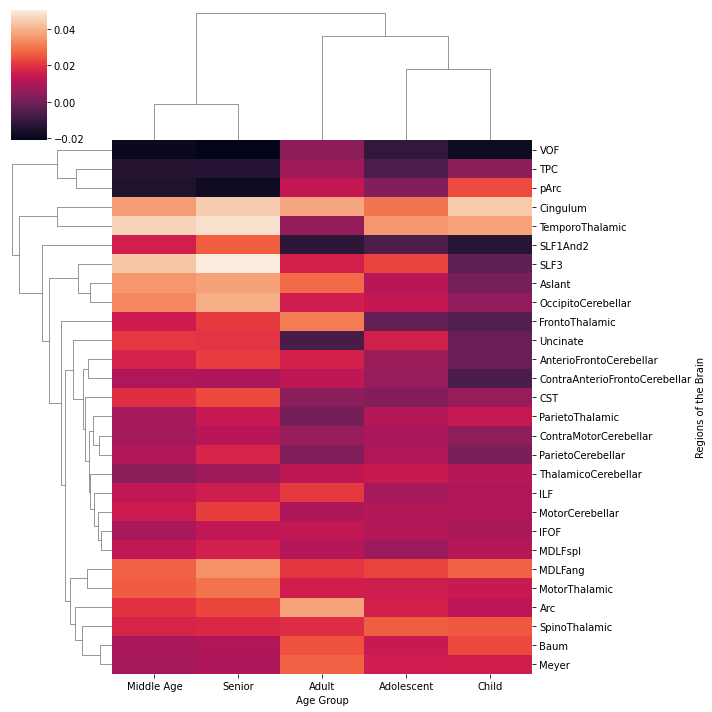

In [16]:
# Reorderinng the clustermap!

area_clustermap = sns.clustermap(heatmap_data_before);

# set the desired order of groups
groups = ['Child', 'Adolescent', 'Adult', 'Middle Age', 'Senior'] 

# reorder indexes/indices besed on the desired order
new_order = []
for group in groups:
    indexes = area_clustermap.data2d.columns.str.startswith(group)
    indexes_locs = np.where(indexes)[0].tolist()
    new_order += indexes_locs
    
## reorder df based on the new order
ordered_df_area = area_clustermap.data2d.iloc[:, new_order]

# ## Run clustermap on the reordered dataframe by disabling 
# ## the clustering for both rows and columns
# sns.clustermap(ordered_df_area,
#               row_cluster=True,
#               col_cluster=False,
#               cmap=colormap)

Text(233.20454545454544, 0.5, 'Area')

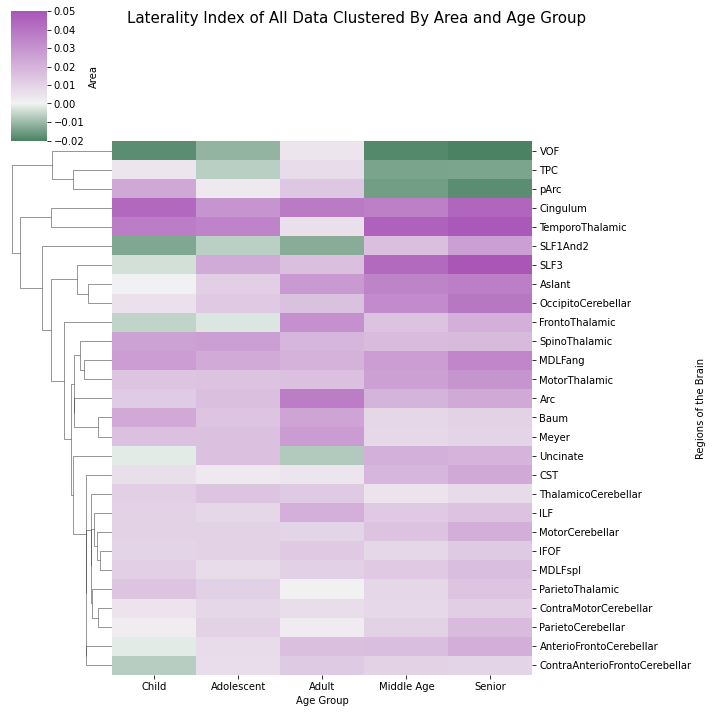

In [31]:
vcenter = 0
vmin, vmax = -0.02, 0.05 # max and min values from graph below
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
colormap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

## Run clustermap on the reordered dataframe by disabling 
## the clustering for both rows and columns

sns.clustermap(ordered_df_area,
              row_cluster=True,
              col_cluster=False,
              norm = normalize,
              method = 'centroid',
              metric = 'euclidean',
              cmap=colormap).fig.suptitle('Laterality Index of All Data Clustered By Area and Age Group', 
                                       fontsize =15) 
plt.ylabel('Area')
# .fig.suptitle('Laterality Index of All Data Clustered By Area and Age Group', fontsize =15) 


In [25]:
d = sch.distance.pdist(ordered_df_area)
L = sch.linkage(ordered_df_area, method='median', metric = 'euclidean')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.292*d.max(), 'distance')

# clusters indicices correspond to incides of original df
for i,cluster in enumerate(clusters):
    print(ordered_df_area.index[i], cluster)

VOF 1
TPC 1
pArc 1
Cingulum 2
TemporoThalamic 3
SLF1And2 4
SLF3 5
Aslant 5
OccipitoCerebellar 5
FrontoThalamic 6
Uncinate 4
AnterioFrontoCerebellar 4
ContraAnterioFrontoCerebellar 4
CST 4
ParietoThalamic 4
ContraMotorCerebellar 4
ParietoCerebellar 4
ThalamicoCerebellar 4
ILF 4
MotorCerebellar 4
IFOF 4
MDLFspl 4
MDLFang 6
MotorThalamic 6
Arc 6
SpinoThalamic 6
Baum 6
Meyer 6


In [19]:
fcluster

NameError: name 'fcluster' is not defined